In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.metrics import f1_score

# Logistic regression
By the name it might seem like Logistic regression is a regression(output value is continious) problem. But the real case is logistic regression is a classification problem(output value is discrete). More specifically logistic regression is a binary classification problem. In this notebook we will deep dive into the mathemetics behind the logistic regression. Also we will see the implementation of logistic regression. Finally, we will measure our performance on breast cancer dataset. And we will compare our performance with scikit-learn logistic regression implementation.

### Hypothesis 
Before implementing the logistic regression we must decide how we are going to represent our function/hypothesis $ h $ in a computer. Let's assume we decided to approximate y as a linear function of x:
$$ y(x) = h_w(x) = b + w_0x_0 + w_0x_0 + ....... $$
Here, $ w_i $'s are the *parameter* this is also known as *weights*. And $ x_i $ represents the input features. If we have a n number of input features then we can simplify the notation as:

$$ h(x) = \sum_{i=0}^n w_ix_i = w^Tx + b $$

This hypothesis will return output between [$ -\infty, +\infty $]. But the output of the logistic regression is binary, it's either 0 or 1 $ y \in \{0, 1\} $. So we need a function that will squizee any value between 0 and 1. *Sigmoid function* is one of the function that does this thing for us. The sigmoid function is 
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$ 
$$ \sigma(h_w(x)) = \sigma(w^Tx + b) = \frac{1}{1 + e^{-(w^Tx + b)}} $$
Let's just implement this function and plot it's graph.

Text(0.5, 1.0, 'Sigmoid function')

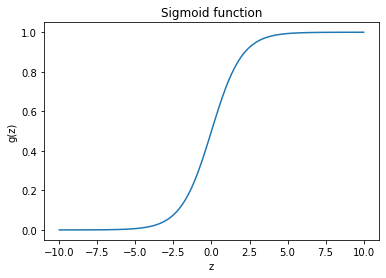

In [67]:
def sigmoid(z):
    z = 1/(1 + np.exp(-z))
    return z
z = np.linspace(-10, 10, 100)   
plt.plot(z, sigmoid(z)) 
plt.xlabel("z") 
plt.ylabel("g(z)") 
plt.title("Sigmoid function")

 We can clearly see that regardless of the input value, output value is between 0 and 1. Instead of the sigmoid function any other function can be used. But sigmoid function is most widely used because of the certain benefits. You can learn more about the benefits of sigmoid function [here](https://sebastianraschka.com/faq/docs/logistic-why-sigmoid.html).  

### Cost function
Cost function is used to measure the performance of any machine learning model. It quantifies the error between the predicted value and expected value. So, our goal is to reduce the error of the overall model. There are set of value of $ w $ that will minimize the value of cost function. We need to find that $ w $ value.
Let's assume that:
Probability of $ y = 1 $ given x is $ h_w(x) $; where the parameters are $ w $
$$ P(y = 1 | x; w) = h_w(x) $$
As it's a binary classification so the probability of $ y = 0 $ given x will be $ 1 - h_w(x) $
$$ P(y = 0 | x; w) = 1 - h_w(x) $$
This can be rewritten compactly as:
$$ P(y | x; w) = (h_w(x))^y(1-h_w(x))^{(1-y)} $$

Assuming that we have $ m $ training examples which are independent with each other, we can write down the likelihood of the parameter as
$$ 
\begin{align}
L(w) &= p(y | X; w) \\
& = \prod_{i=1}^m p(y^{(i)} | x^{(i)}; w) \\
& = \prod_{i=1}^m (h_w(x^{(i)}))^{y^{(i)}}(1-h_w(x^{(i)}))^{(1-y)^{(i)}}
\end{align} 
$$ 

This equation contains the product of many probability. And the probability is a small number which is less than number. Multiplying many small number might make the resulting number close to 0. So it would be hard to maximize/minimize that. So it's better to convert the prodcut into summation. For that instead of maximizing/minimizing the likelihood we will maximize/minimize the log likelihood

$$
\begin{align}
\ell(w) &= log L(w) \\
&= \sum_{i=1}^m y^{(i)} log h(x^{(i)}) + (1 - y^{(i)}) log(1-h(x^{(i)}))
\end{align}
$$

Instead of maximizing the log likelihood we can also minimize the negetive of log likelihood. Both works same. But the name cost is something like it should be reduced so we are minimizing it.

$$ \ell(w) = - \sum_{i=1}^m y^{(i)} log h(x^{(i)}) + (1 - y^{(i)}) log(1-h(x^{(i)})) $$
```python
a = h_w(x) = sigmoid(np.dot(x, w) + b)
cost = - np.sum(y *(np.log(a) + (1-y) * np.log(1-a)) / m
```
we can minimize this using the [gradient descent](https://www.youtube.com/watch?v=IHZwWFHWa-w). For that we need to take the derivate of the cost function. 
$$ \frac{\partial \ell(w)}{\partial w_j} = (h_w(x) - y)x_j $$
```python

dw = np.dot(x.T, (a-y)) / m
db = np.sum(a -y) /m
```
The update rule for our parameter w is: 
$$ w_j := w_j - \alpha \frac{\partial \ell(w)}{\partial w_j} $$

```python
w = w - alpha * dw
b = b - alpha * db
```

## General Architecture of the learning algorithm ##
![lg cat](./lg_cat.png)

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


In [68]:
def propagate(w, b, x, y):
        """
        Implement the cost function and its gradient for the propagation explained above

        :param: w -- weights, a numpy array of size (x.shape[1], 1). Number of feature of x
        :param: b -- bias, a scalar
        :param: x -- data of size (number_of_training_example, number of feature)
        :param: y -- true "label" vector of size (number_of_training_example, 1)

        :returns: cost -- negative log-likelihood cost for logistic regression
        :returns: dw -- gradient of the loss with respect to w, thus same shape as w
        :returns: db -- gradient of the loss with respect to b, thus same shape as b
        """

        m = x.shape[0]  # Number of training example

        # FORWARD PROPAGATION (FROM x TO COST)
        a = sigmoid(np.dot(x, w) + b)  # compute activation
        cost = - np.sum(y * np.log(a) + (1 - y) * np.log(1 - a)) / m  # compute cost
        # BACKWARD PROPAGATION (TO FIND GRAD)
        dw = np.dot(x.T, (a - y)) / m
        db = np.sum(a - y) / m

        cost = np.squeeze(cost)

        grads = {"dw": dw,
                 "db": db}
        return grads, cost


In [69]:
def optimize(w, b, x, y, num_iteration, learning_rate, verbose):
        """
        This function optimizes w and b by running a gradient descent algorithm

        Arguments:
        w -- weights, a numpy array of size (x.shape[1], 1). Number of feature of x
        b -- bias, a scalar
        x -- data of shape (number_of_training_example, number of feature)
        y -- true "label" vector, of shape (1, number of examples)

        Returns:
        params -- dictionary containing the weights w and bias b
        grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
        costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
        """

        costs = {}

        for i in range(num_iteration):

            # Cost and gradient calculation
            grads, cost = propagate(w, b, x, y)

            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]

            # update rule
            w = w - learning_rate * dw
            b = b - learning_rate * db

            # Record the costs
            if i % 100 == 0:
                costs[i] = cost

            # Print the cost every 100 training iterations
            if verbose and i % 100 == 0:
                print("Cost after iteration %i: %f" % (i, cost))

        return w, b, costs

In [70]:
def predict(x, w, b):
        """
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

        Arguments:
        w -- weights, a numpy array of size (x.shape[1], 1). Number of feature of x
        b -- bias, a scalar
        x -- data of size (number_of_training_example, number of feature)

        Returns:
        y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in x
        """

        m = x.shape[0]
        y_prediction = np.zeros((m, 1))
        w = w.reshape(x.shape[1], 1)

        # Compute vector "A" predicting the probabilities of a cat being present in the picture
        a = sigmoid(np.dot(x, w) + b)

        for i in range(a.shape[0]):
            # Convert probabilities A[0,i] to actual predictions p[0,i]
            y_prediction[i][0] = 0 if a[i][0] <= .5 else 1

        return y_prediction

In [77]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, verbose = True):
        """
        Builds the logistic regression model by calling the function you've implemented previously

        Arguments:
        x_train -- training set represented by a numpy array of shape (number_of_training_example, number of feature)
        y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
        x_test -- test set represented by a numpy array of shape (number_of_training_example, number of feature)
        y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
        num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
        learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
        print_cost -- Set to true to print the cost every 100 iterations

        Returns:
        d -- dictionary containing information about the model.
        """
        # Resizing the y input
        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)
        # initialize parameters with zeros
        w = np.zeros((x_train.shape[1],1))
        b = 0

        # Gradient descent
        w, b, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, verbose)
        y_prediction_test = predict(x_test, w, b)
        y_prediction_train = predict(x_train, w, b)
        train_acc = 100 - np.mean(np.abs(y_prediction_train - y_train)) * 100
        test_acc = 100 - np.mean(np.abs(y_prediction_test - y_test)) * 100
        train_f1 = f1_score(y_train, y_prediction_train)
        test_f1 = f1_score(y_test, y_prediction_test)
        print("Train f1 score: ", train_f1)
        print("Test f1 score: ", test_f1)

        return {"costs": costs, "train_accuracy": train_acc, "test_accuracy": test_acc, "train_f1": train_f1,
                "test_f1": test_f1}

In [78]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33, random_state=42)

In [80]:
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [81]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_train:  (381, 30)
y_train:  (381,)


In [83]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.005, verbose = False)

Train f1 score:  0.9853249475890986
Test f1 score:  0.9917355371900827


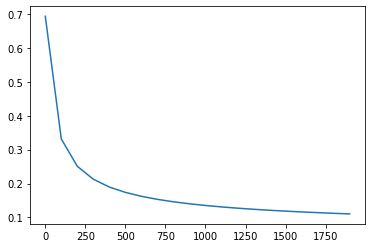

In [89]:
plt.plot(list(d["costs"].keys()), list(d["costs"].values()))